In [1]:
import psycopg2
import config as creds
import sqlalchemy
from sqlalchemy import create_engine
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user=creds.PGUSER
password=creds.PGPASSWORD
host=creds.PGHOST
port=5432
database=creds.PGDATABASE

In [3]:
engine_str=f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"

In [4]:
engine = create_engine(engine_str)

In [5]:
#conn = engine.connect()
conn = engine.raw_connection()
print('Connected')

Connected


In [6]:
cur = conn.cursor()
print('Cursor created')

Cursor created


In [7]:
query1='''
SELECT b.PID, b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, n.TAVG, n.CLDD, n.HTDD
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.DCREALPROPERTYID = '0453_5030'
AND b.REPORTINGYEAR = 2019
AND b.ELEGAS = 'E'
AND n.CLDD > 0; 
'''

In [8]:
df1=pd.read_sql(query1,conn)

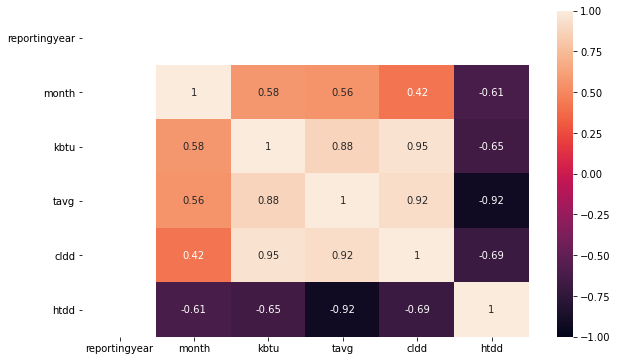

In [9]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df1.corr(),vmin=-1,vmax=1,annot=True);

<AxesSubplot:xlabel='cldd', ylabel='kbtu'>

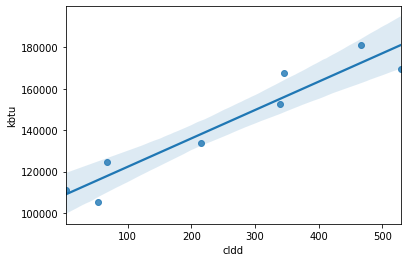

In [10]:
sns.regplot(x='cldd',y='kbtu',data=df1)

In [11]:
line1= stats.linregress(x=df1['cldd'], y=df1['kbtu'])
print(line1)

LinregressResult(slope=136.94198677168146, intercept=108609.21809180398, rvalue=0.9519616128453875, pvalue=0.00026725463678041917, stderr=17.98338360387586)


In [12]:
query9='''
SELECT b.PID, b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, n.TAVG, n.CLDD, n.HTDD
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.DCREALPROPERTYID = '0453_5030'
AND b.REPORTINGYEAR = 2019
AND b.ELEGAS = 'E'
AND n.HTDD > 0; 
'''

In [13]:
df9=pd.read_sql(query9,conn)

<AxesSubplot:xlabel='htdd', ylabel='kbtu'>

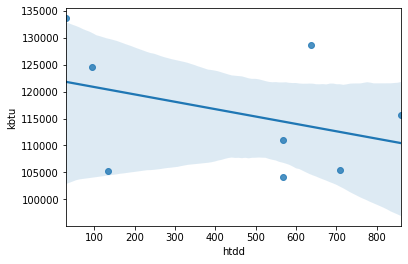

In [14]:
sns.regplot(x='htdd',y='kbtu',data=df9)

In [15]:
line2= stats.linregress(x=df9['kbtu'], y=df9['htdd'])
print(line2)

LinregressResult(slope=-0.01027603710036161, intercept=1642.2974466464284, rvalue=-0.37517907681615065, pvalue=0.35976411924792384, stderr=0.01036498882142619)


<AxesSubplot:xlabel='tavg', ylabel='kbtu'>

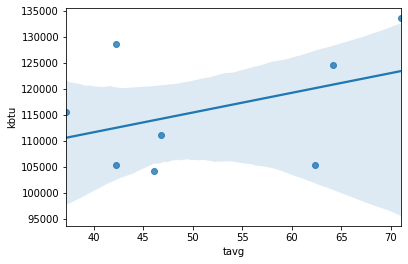

In [16]:
sns.regplot(x='tavg',y='kbtu',data=df9)

In [17]:
line3= stats.linregress(x=df9['kbtu'], y=df9['tavg'])
print(line3)

LinregressResult(slope=0.00044090405936835576, intercept=0.31464823940306985, rvalue=0.4089723542413134, pvalue=0.31439147391031796, stderr=0.00040163324529225334)


In [18]:
query3='''
SELECT PRIMARYPROPERTYTYPE_SELFSELECT AS self, AVG(KBTU/TAXRECORDFLOORAREA) AS kbtusqft
FROM buildings_data
WHERE ELEGAS = 'E'
AND REPORTINGYEAR = 2019
AND MONTH = 12
AND TAXRECORDFLOORAREA > 0
GROUP BY PRIMARYPROPERTYTYPE_SELFSELECT, MONTH
ORDER BY PRIMARYPROPERTYTYPE_SELFSELECT;

'''

In [19]:
df3=pd.read_sql(query3,conn)

In [20]:
df3.columns

Index(['self', 'kbtusqft'], dtype='object')

In [21]:
df3.head()

,self,kbtusqft
0,0,0.000000
1,10,4.353707
2,11,2.865692
3,13,6.893443
4,14,2.919959


In [22]:
query4='''
SELECT *
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.REPORTINGYEAR = 2018; 
'''

In [23]:
df4=pd.read_sql(query4,conn)

In [24]:
df4.columns

Index(['id', 'pid', 'dcrealpropertyid', 'ward', 'postalcode', 'yearbuilt',
       'reportingyear', 'reportstatus', 'primarypropertytype_selfselect',
       'taxrecordfloorarea', 'reportedbuildinggrossfloorarea',
       'energystarscore', 'month', 'kbtu', 'elegas', 'id', 'date', 'awnd',
       'cldd', 'htdd', 'snow', 'tavg', 'tmax', 'tmin', 'wdf2', 'wdf5', 'wsf2',
       'wsf5', 'weatheryear', 'month'],
      dtype='object')

KeyError: 'Unrecognized key "xtick.fontweight" for group "xtick" and name "fontweight"'

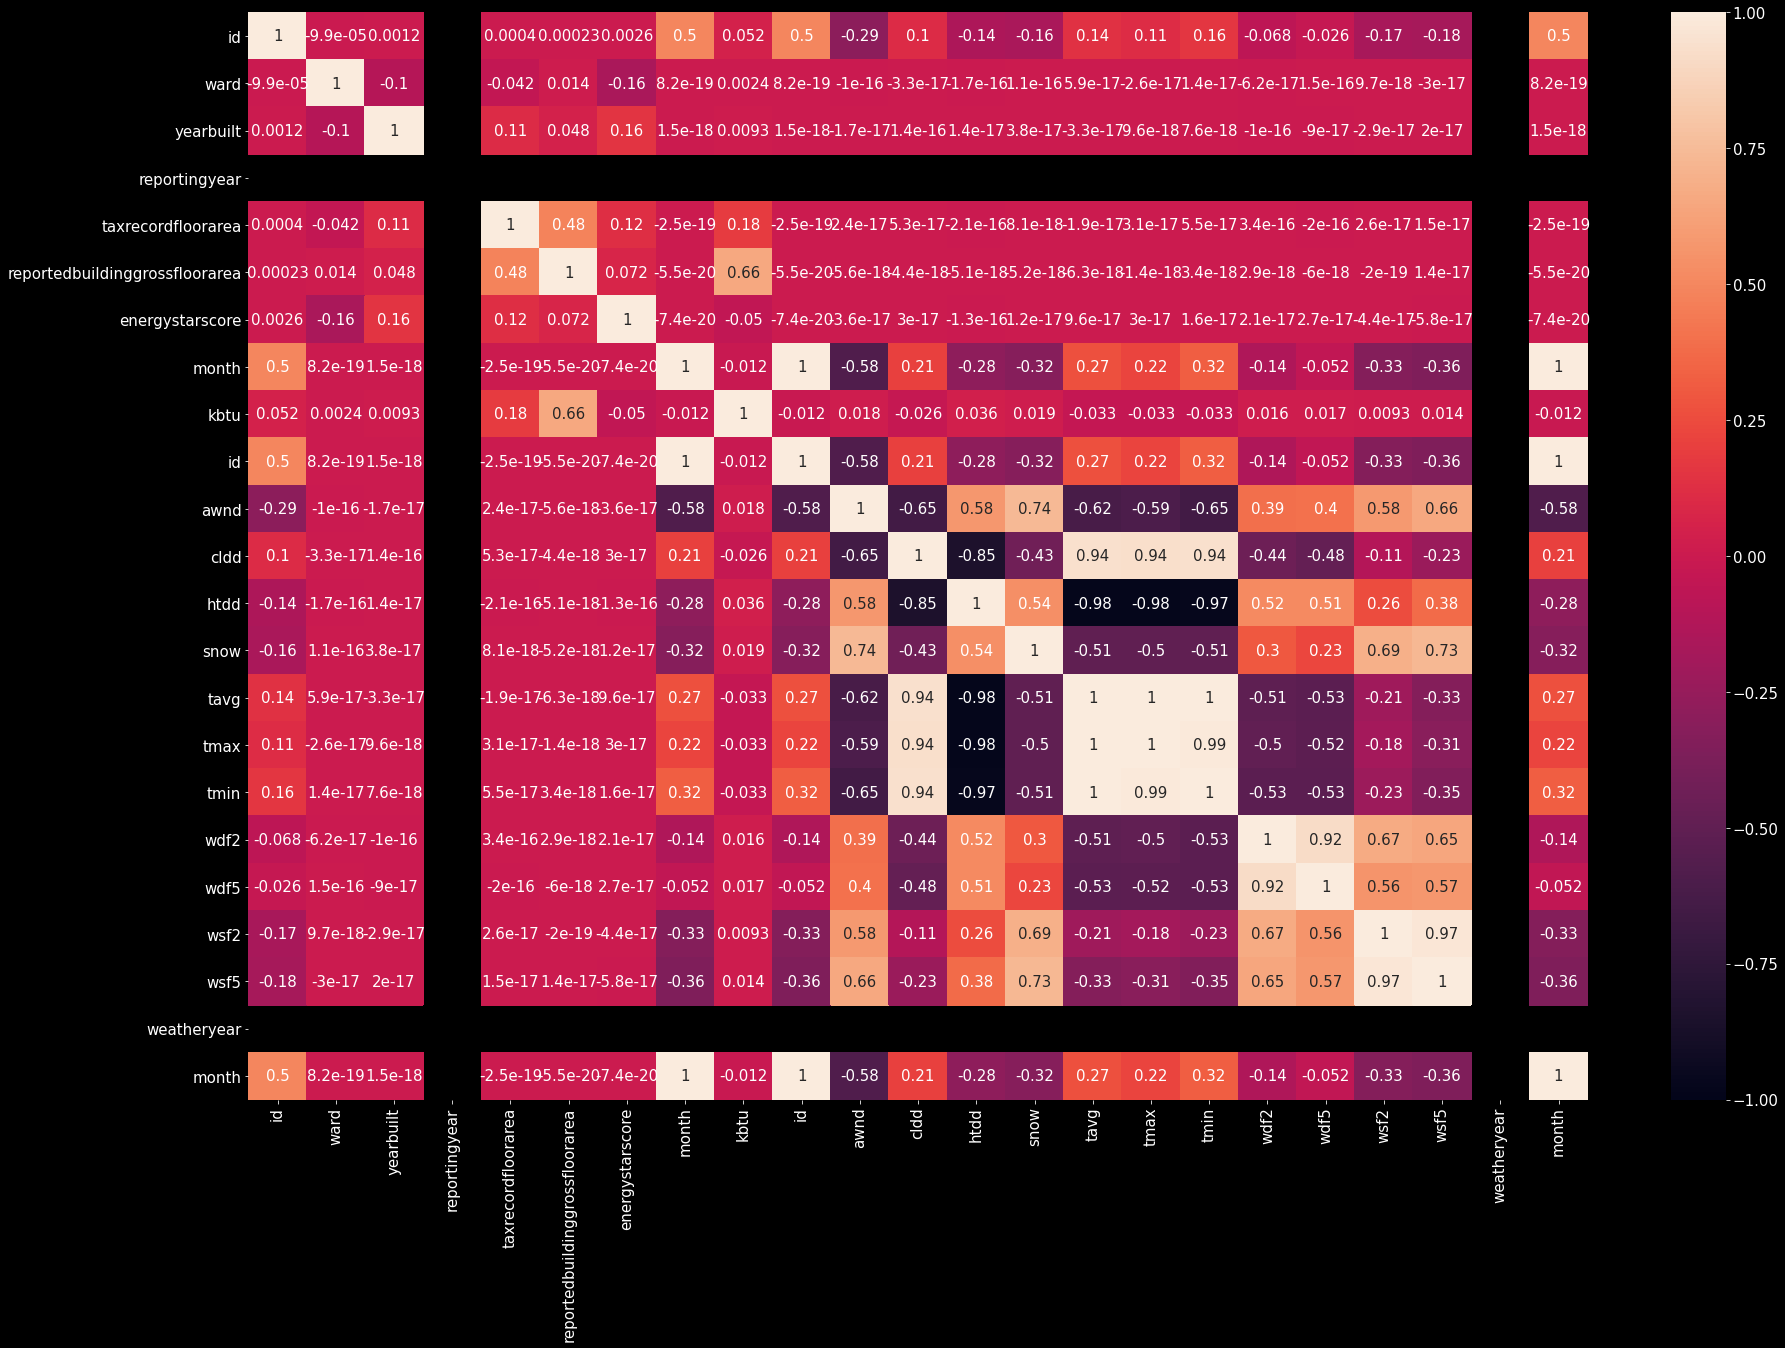

In [34]:
plt.style.use('dark_background')
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(df4.corr(),vmin=-1,vmax=1,annot=True, cmap="rocket");
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.show()

In [ ]:
query5='''
SELECT b.PID, b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, AVG(b.KBTU/b.TAXRECORDFLOORAREA) as kbtusqft, n.TAVG, n.CLDD, n.HTDD
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.DCREALPROPERTYID = '0453_5030'
AND b.REPORTINGYEAR = 2018
AND b.ELEGAS = 'E'
AND b.TAXRECORDFLOORAREA > 0 
GROUP BY b.PID,b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, n.TAVG, n.CLDD, n.HTDD; 
'''

In [ ]:
df5=pd.read_sql(query5,conn)

In [ ]:
df5reg = sns.PairGrid(df5, y_vars=['tavg', 'cldd', 'htdd'], x_vars=['kbtu','kbtusqft'], height = 4)
df5reg.map(sns.regplot, color='blue')


In [ ]:
query6='''
SELECT b.PID, b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, AVG(b.KBTU/b.TAXRECORDFLOORAREA) as kbtusqft, n.TAVG, n.CLDD, n.HTDD
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.DCREALPROPERTYID = '0453_5030'
AND b.REPORTINGYEAR = 2018
AND b.ELEGAS = 'N'
AND b.TAXRECORDFLOORAREA > 0 
GROUP BY b.PID,b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, n.TAVG, n.CLDD, n.HTDD;
'''

In [ ]:
df6=pd.read_sql(query6,conn)

In [ ]:
df6.head()

In [ ]:
df6reg = sns.PairGrid(df6, y_vars=['tavg', 'cldd', 'htdd'], x_vars=['kbtu','kbtusqft'], height = 4)
df6reg.map(sns.regplot, color='blue')

In [ ]:
query7='''
SELECT b.PID, b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, AVG(b.KBTU/b.TAXRECORDFLOORAREA) as kbtusqft, n.TAVG, n.CLDD, n.HTDD
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.DCREALPROPERTYID = '0453_5030'
AND b.REPORTINGYEAR = 2019
AND b.ELEGAS = 'E'
AND b.TAXRECORDFLOORAREA > 0 
GROUP BY b.PID,b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, n.TAVG, n.CLDD, n.HTDD;
'''

In [ ]:
df7=pd.read_sql(query7,conn)

In [ ]:
df7.head()

In [ ]:
df7reg = sns.PairGrid(df7, y_vars=['tavg', 'cldd', 'htdd'], x_vars=['kbtu','kbtusqft'], height = 4)
df7reg.map(sns.regplot, color='blue')

In [ ]:
query8='''
SELECT b.PID, b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, AVG(b.KBTU/b.TAXRECORDFLOORAREA) as kbtusqft, n.TAVG, n.CLDD, n.HTDD
FROM buildings_data b
LEFT OUTER join noaa_data n
ON b.REPORTINGYEAR = n.WEATHERYEAR
WHERE b.MONTH = n.MONTH
AND b.DCREALPROPERTYID = '0453_5030'
AND b.REPORTINGYEAR = 2019
AND b.ELEGAS = 'N'
AND b.TAXRECORDFLOORAREA > 0 
GROUP BY b.PID,b.REPORTINGYEAR, b.MONTH, b.ELEGAS, b.KBTU, n.TAVG, n.CLDD, n.HTDD;
'''

In [ ]:
df8=pd.read_sql(query8,conn)

In [ ]:
df8.head()

In [ ]:
df8reg = sns.PairGrid(df8, y_vars=['tavg', 'cldd', 'htdd'], x_vars=['kbtu','kbtusqft'], height = 4)
df8reg.map(sns.regplot, color='blue')

In [ ]:
# def make_lin_regression(xval,yval,dataframe,loc_var):
#     dataframe.loc[loc_var]
#     sns.regplot(x=xval,y=yval,data=df)

In [35]:
conn.close()
print('Closed')

Closed
